### Одномерный поиск с учётом условий Вольфе.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from utils import *

In [49]:
# 0 < c1 < c2 < 1 
def linear_wolf(f, c1, c2, a, b, eps = 0.01, points_check = []):
    def check_wolf(x, alpha):
        new_x = x + alpha
        
        new_val = f(new_x)
        new_d_val = grad(f)(new_x)[0]
        
        old_d_val = grad(f)(x)[0]
        old_val = f(x)

        is_first = new_val <= old_val + c1 * alpha * old_d_val
        is_second = new_d_val >= c2 * old_d_val
        return [is_first, is_second]
    
    points_check = []

    if b - a < eps:
        return (a+b)/2
    else:
        alpha = (b-a)/2
        
        conditions = check_wolf(a, alpha)
        new_val = a + alpha
        if (not conditions[0]):
            points_check.append(new_val)
            return linear_wolf(f, c1, c2, a, new_val, eps = eps, points_check=points_check)  # turn left
        elif (not conditions[1]):
            return linear_wolf(f, c1, c2, new_val, b, eps=eps, points_check=points_check) # turn right
        else:
            # print(a)
            # print(b)
            # print(alpha)
            return new_val

In [46]:
def wolf_descent(f, c1, c2, lr0, epoch = 100, x = [0,0], eps = 0.01):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        d = np.array(grad(f)(*x))
        f_line = lambda a: f((x - a*d)[0], (x - a*d)[1])
        new_x = linear_wolf(f_line, c1, c2, -lr0, lr0, eps)
        x = x - new_x * d
        points[i] = x  
    
    return points

In [31]:
def f(x): #simple example
    return x**2

In [34]:
linear_wolf(f, 0.5, 0.5, -1, 1)

-1
0.0
0.5


-0.5

In [50]:
с1 = 0.5
c2 = 0.5
# example
def f(x, y): 
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3)*np.cos(2*x+1-np.exp(y))
    
def method(f, tmin, tmax, lr0, epoch = 50,  x = [0,0]):
    points = wolf_descent(f,с1, c2, lr0, epoch=epoch, x=x)
    t = np.linspace(tmin, tmax, 100)
    X, Y = np.meshgrid(t, t)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(f(points[:, 0], points[:, 1]))
    ax1.grid()
    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f(X, Y), levels=sorted(list(set([f(*p) for p in points] + list(np.linspace(-1, 1, 100))))))
    print(f(points[-1, 0], points[-1, 1])) 

0.4035968831164687


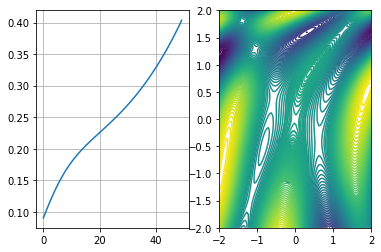

In [52]:
method(f, -2, 2, 0.05, x = [-0.4, -0.4])